#### Integrantes:
 - Armando Arzola Pérez 
 - Karla Paola Clavel Ojeda 
 - Yessica Fabiola Santiago Valdes 

# 1. Análisis exploratorio de datos

#### Dataset information:
- Dataset Characteristics: Multivariate
- Subject Area: Business
- Associated Tasks: Classification
- Feature Type: Categorical, Integer, Real
- Instances: 690
- Features: 15


## Bibliotecas y lectura de datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


df = pd.read_csv("crx.data", na_values='?')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Num. de filas y columnas
df.shape

(690, 16)

Una rápida inspección del libro de códigos revela que todos los valores en el conjunto de datos han sido transformados en símbolos sin significado para preservar la confidencialidad de la información, por lo que se ha decidido incorporar el nombre de los atributos según la inspección y el contexto del conjunto de datos:

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
#nombre de las columnas
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [5]:
#valores NaN contados de cada atributo
df.isna().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [6]:
df.nunique(axis=0) #Devuelve un número de valores únicos para cada variable

Gender              2
Age               349
Debt              215
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

### Limpiar datos

#### Algoritmo. Elimina los valores nulos, deja espacios en blanco 

In [7]:
NA_val = df.isna().sum()
def na_filter(na, threshold = .02): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df[na_filter(NA_val)]
df_cleaned.columns
df_cleaned.shape

(690, 16)

#### Creación de documento csv

In [8]:
df_cleaned.to_csv('creditApp.csv')

In [9]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) 

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.000000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.400000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.862940,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.000000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.000000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [10]:
#Verificación de valores unicos en Employed
df_cleaned.Employed.unique()

array(['t', 'f'], dtype=object)

In [11]:
#Verificación de valores unicos en DriverLIcense
df_cleaned.DriversLicense.unique()

array(['f', 't'], dtype=object)

In [12]:
#Verificación de valores unicos en Citizen
df_cleaned.Citizen.unique()

array(['g', 's', 'p'], dtype=object)

In [13]:
#Verificación de valores unicos en BankCustomer
df_cleaned.BankCustomer.unique()

array(['g', 'p', nan, 'gg'], dtype=object)

In [14]:
df_cleaned.Married.unique()

array(['u', 'y', nan, 'l'], dtype=object)

In [15]:
df_cleaned.EducationLevel.unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', nan], dtype=object)

In [16]:
#Cambio de valores de '+' por '1' y '-' por '0'
df_cleaned['Approved'] = df_cleaned['Approved'].replace('-', '0')
df_cleaned['Approved'] = df_cleaned['Approved'].replace('+', '1')

In [17]:
#cambio de valores para Employed
df_cleaned['Employed'] = df_cleaned['Employed'].replace('f', '0')
df_cleaned['Employed'] = df_cleaned['Employed'].replace('t', '1')

#Cambio de valores para DriverLIcense
df_cleaned['DriversLicense'] = df_cleaned['DriversLicense'].replace('f', '0')
df_cleaned['DriversLicense'] = df_cleaned['DriversLicense'].replace('t', '1')

#Cambio de valores para PriorDefault
df_cleaned['PriorDefault'] = df_cleaned['PriorDefault'].replace('f', '0')
df_cleaned['PriorDefault'] = df_cleaned['PriorDefault'].replace('t', '1')

In [18]:
df_cleaned.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,120.0,0,1


In [19]:
df_cleaned = df_cleaned.copy().drop(['Gender','Ethnicity','Married','BankCustomer', 'EducationLevel','ZipCode','Citizen'], axis=1)

In [20]:
df_cleaned.head()

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,30.83,0.000,1.25,1,1,1,0,0,1
1,58.67,4.460,3.04,1,1,6,0,560,1
2,24.50,0.500,1.50,1,0,0,0,824,1
3,27.83,1.540,3.75,1,1,5,1,3,1
4,20.17,5.625,1.71,1,0,0,0,0,1


In [21]:
#valores NaN contados de cada atributo
df_cleaned.isna().sum()

Age               12
Debt               0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Income             0
Approved           0
dtype: int64

#### Matriz de correlación

<AxesSubplot:>

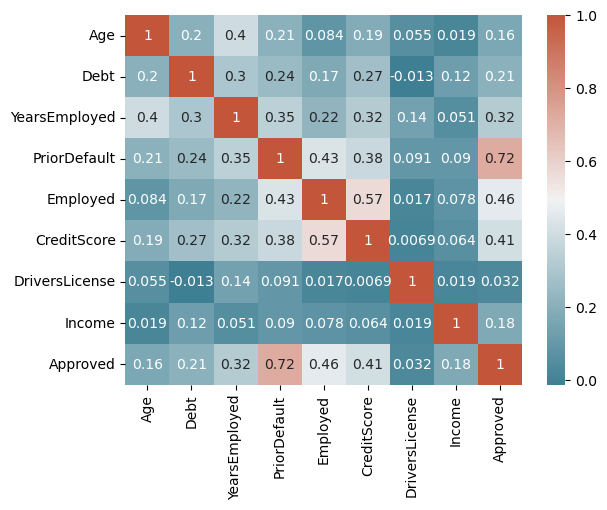

In [22]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Boxplot

<AxesSubplot:xlabel='Debt'>

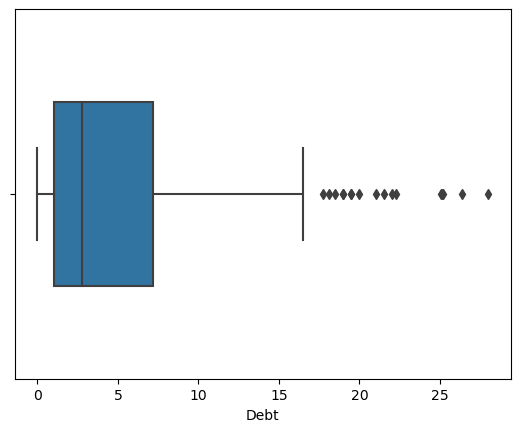

In [23]:
sns.boxplot(x=df_cleaned["Debt"], width= 0.5)

<AxesSubplot:xlabel='YearsEmployed'>

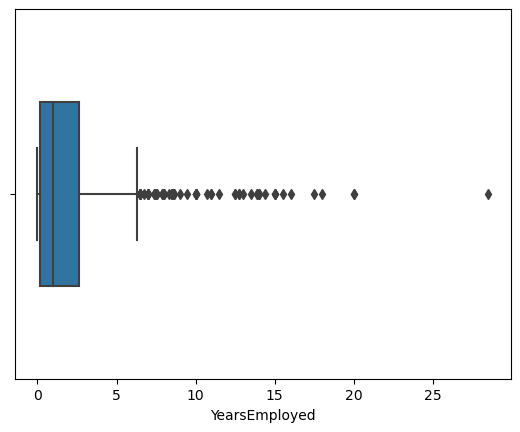

In [24]:
sns.boxplot(x=df_cleaned["YearsEmployed"], width=0.5)

## 2. Decisión de mejor modelo para Clasificación con justificación

#### 2.2 Utilizando WEKA para experimentos

### Rules -> JRIP

Información obtenida antes de limpiar los datos

![Alt text](image-1.png)

Información obtenida después de limpiar los datos: 

![Alt text](image-6.png)

### Rules -> Decision Table

Datos iniciales: 


![Alt text](image-2.png)

Datos limpios:

![Alt text](image-7.png)

### Trees -> Random forest

Datos iniciales:

![Alt text](image-4.png)

Datos limpios

![Alt text](image-8.png)

##    4. Resultados e interpretación

### 4.1 ¿Que se desea obtener?

    R: Se desea obtener información acerca de los criterios y factores que influyen en la aprobación o el rechazo de una solicitud de crédito bancario. Esto implica comprender cuáles son las variables y condiciones que los bancos consideran al evaluar la viabilidad de otorgar un préstamo a un solicitante

### 4.2 ¿Qué tan preciso es el modelo?

        R: De acuerdo a los experimentos realizados en WEKA, el modelo más destacado fue el de Decision Table, con un 97% de instancias clasificadas correctamente.

### 4.3 ¿Que acciones me permite llevar a cabo el modelo?

El modelo utilizando fue Decision Table, el cual es una representación tabular de todas las condiciones y acciones. Las Tablas de Decisiones se utilizan siempre que la lógica de procesamiento es muy complicada e involucra múltiples condiciones. 

El modelo es útil en contextos donde se deben tomar decisiones basadas en múltiples condiciones y acciones. Algunos ejemplos de situaciones en las que se pueden utilizar Decision Tables incluyen:

- Sistemas de Gestión de Crédito: Los bancos y las instituciones financieras utilizan Decision Tables para determinar si otorgan o niegan crédito a los solicitantes en función de factores como historial crediticio, ingresos, deudas y otros criterios.

- Control de Calidad de Fabricación: En la industria manufacturera, las Decision Tables se utilizan para decidir si un producto cumple con los estándares de calidad en función de múltiples especificaciones técnicas y de rendimiento.

- Sistemas de Control de Tráfico: En el control del tráfico aéreo o de tráfico en carreteras, las Decision Tables ayudan a los controladores aéreos o de tráfico a tomar decisiones sobre rutas, altitudes y desviaciones en función de diversas condiciones, como el clima y la disponibilidad de pistas.

- Toma de Decisiones Médicas: En medicina, se pueden utilizar Decision Tables para ayudar a los médicos a determinar el diagnóstico y el plan de tratamiento en función de los síntomas del paciente, resultados de pruebas y antecedentes médicos.

- Pruebas de Software: En el campo de las pruebas de software, las Decision Tables ayudan a diseñar casos de prueba que cubran diferentes combinaciones de entradas y condiciones, lo que permite una cobertura exhaustiva de las pruebas.

- Gestión de Inventario: Las Decision Tables pueden utilizarse en la gestión de inventario para decidir cuándo realizar pedidos de reposición en función de factores como el nivel de inventario actual y la demanda prevista.

- Seguridad de Red: En la seguridad informática, se pueden utilizar Decision Tables para definir políticas de seguridad que determinen cómo se deben manejar los accesos y las amenazas en una red informática.

- Automatización de Procesos Empresariales: En la automatización de procesos empresariales, las Decision Tables pueden guiar la secuencia de acciones que deben llevarse a cabo en función de condiciones empresariales y reglas de negocio.
